In [1]:
import ants
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

/data/aglinska/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/data/aglinska/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/data/aglinska/anaconda3/lib/python3.8/site-packages/paramiko/transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [ ]:
pwd

In [2]:
# df = pd.read_csv('../check_done_analyses.csv')
# idx = df[['COMPCORR_1', 'COMPCORR_2', 'DEEPCOR_1', 'DEEPCOR_2','preproc_1', 'preproc_2']].values.mean(axis=1)==1.0
# #idx = df[['COMPCORR_strict_1', 'COMPCORR_strict_2', 'DEEPCOR_strict_1', 'DEEPCOR_strict_2','preproc_1', 'preproc_2']].values.mean(axis=1)==1.0
# df = df.iloc[idx]
# print(df.shape)
# df.head()

In [130]:
fmriprep_dir = '../Data/020-fmriprepped/'
subs_all = [i for i in os.listdir(fmriprep_dir) if all( (i.startswith('sub-'),not i.endswith('.html')) )]
subs_all = np.array(subs_all)

In [207]:
compor_name = 'COMPCORR'
deepcor_name = 'DEEPCOR_BG'

In [208]:
analysis_fn_raw = '../analyses_SPM/preproc_{r}/{sub}/spmT_0001.nii'
analysis_fn_compcor = '../analyses_SPM/{name}_{r}/{sub}/spmT_0001.nii'
analysis_fn_deepcor = '../analyses_SPM/{name}_{r}/{sub}/spmT_0001.nii'

In [209]:
check_done = [[os.path.exists(analysis_fn_raw.format(sub=sub,r=1)),
os.path.exists(analysis_fn_raw.format(sub=sub,r=2)),
os.path.exists(analysis_fn_compcor.format(sub=sub,r=1,name=compor_name)),
os.path.exists(analysis_fn_compcor.format(sub=sub,r=2,name=compor_name)),
os.path.exists(analysis_fn_deepcor.format(sub=sub,r=1,name=deepcor_name)),
os.path.exists(analysis_fn_deepcor.format(sub=sub,r=2,name=deepcor_name))] for sub in subs_all]

In [210]:
idx = np.array(check_done).mean(axis=1)==1.0

In [211]:
subs = subs_all[idx]
nsubs = len(subs)
print(f'{len(subs)}/{len(subs_all)}')

34/34


In [212]:
ims_raw_run1 = [ants.image_read(f'../analyses_SPM/preproc_1/{sub}/spmT_0001.nii') for sub in subs]
ims_raw_run2 = [ants.image_read(f'../analyses_SPM/preproc_2/{sub}/spmT_0001.nii') for sub in subs]

ims_compcor_run1 = [ants.image_read(f'../analyses_SPM/{compor_name}_1/{sub}/spmT_0001.nii') for sub in subs]
ims_compcor_run2 = [ants.image_read(f'../analyses_SPM/{compor_name}_2/{sub}/spmT_0001.nii') for sub in subs]

ims_deepcor_run1 = [ants.image_read(f'../analyses_SPM/{deepcor_name}_1/{sub}/spmT_0001.nii') for sub in subs]
ims_deepcor_run2 = [ants.image_read(f'../analyses_SPM/{deepcor_name}_2/{sub}/spmT_0001.nii') for sub in subs]

In [237]:
ffa_map = ants.image_read('../Misc/ffa_map_resampled.nii')
ffa_mask = ffa_map.copy()
thresh = 10
ffa_mask[ffa_mask<thresh]=0
ffa_mask[ffa_mask>=thresh]=1
ffa_mask.to_filename('../Misc/ffa_mask_resampled.nii')

In [238]:
ffa_mask = ants.image_read('../Misc/ffa_mask_resampled.nii')
roi_mask = ffa_mask.numpy()==1.0
print(roi_mask.sum())

682


In [239]:
roi_vals_raw_run1 = [im.numpy()[roi_mask].mean() for im in ims_raw_run1]
roi_vals_raw_run2 = [im.numpy()[roi_mask].mean() for im in ims_raw_run2]

roi_vals_compcor_run1 = [im.numpy()[roi_mask].mean() for im in ims_compcor_run1]
roi_vals_compcor_run2 = [im.numpy()[roi_mask].mean() for im in ims_compcor_run2]

roi_vals_deepcor_run1 = [im.numpy()[roi_mask].mean() for im in ims_deepcor_run1]
roi_vals_deepcor_run2 = [im.numpy()[roi_mask].mean() for im in ims_deepcor_run2]

roi_vals_raw_run1 = np.array(roi_vals_raw_run1)
roi_vals_raw_run2 = np.array(roi_vals_raw_run2)
roi_vals_compcor_run1 = np.array(roi_vals_compcor_run1)
roi_vals_compcor_run2 = np.array(roi_vals_compcor_run2)
roi_vals_deepcor_run1 = np.array(roi_vals_deepcor_run1)
roi_vals_deepcor_run2 = np.array(roi_vals_deepcor_run2)

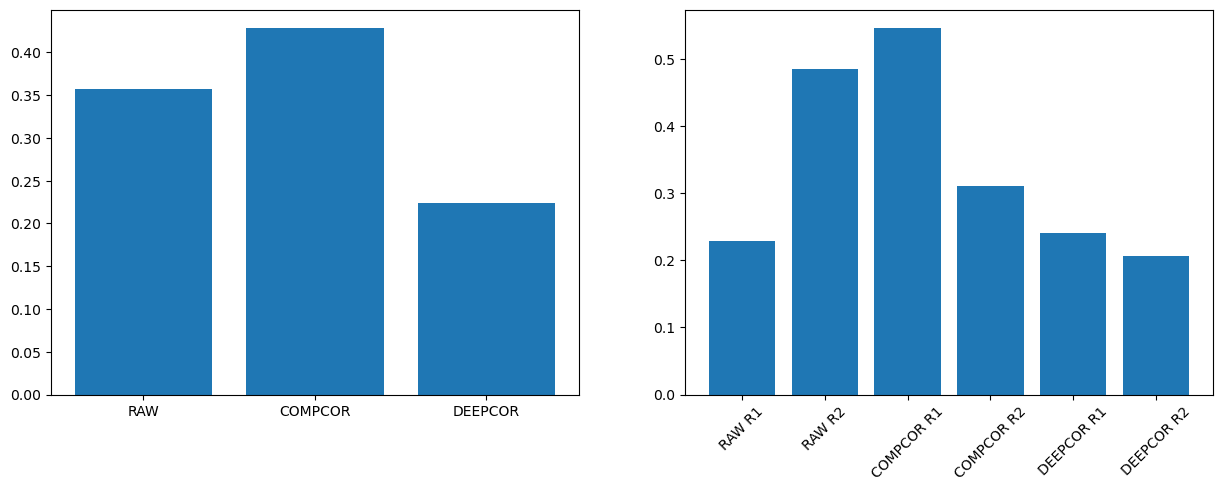

In [240]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ys = (np.hstack((roi_vals_raw_run1,roi_vals_raw_run2)).mean(),
np.hstack((roi_vals_compcor_run1,roi_vals_compcor_run2)).mean(),
np.hstack((roi_vals_deepcor_run1,roi_vals_deepcor_run2)).mean(),)
xs = [0,1,2];
plt.bar(xs,ys);
plt.xticks(xs,['RAW','COMPCOR','DEEPCOR']);

plt.subplot(1,2,2)
arrs = [roi_vals_raw_run1,roi_vals_raw_run2,roi_vals_compcor_run1,roi_vals_compcor_run2,roi_vals_deepcor_run1,roi_vals_deepcor_run2];
xs = np.arange(len(arrs));
ys = [val.mean() for val in arrs];
plt.bar(xs,ys);
plt.xticks(xs,['RAW R1','RAW R2','COMPCOR R1','COMPCOR R2','DEEPCOR R1','DEEPCOR R2'],rotation=45);

Text(0.5, 1.0, 'DeepCorr')

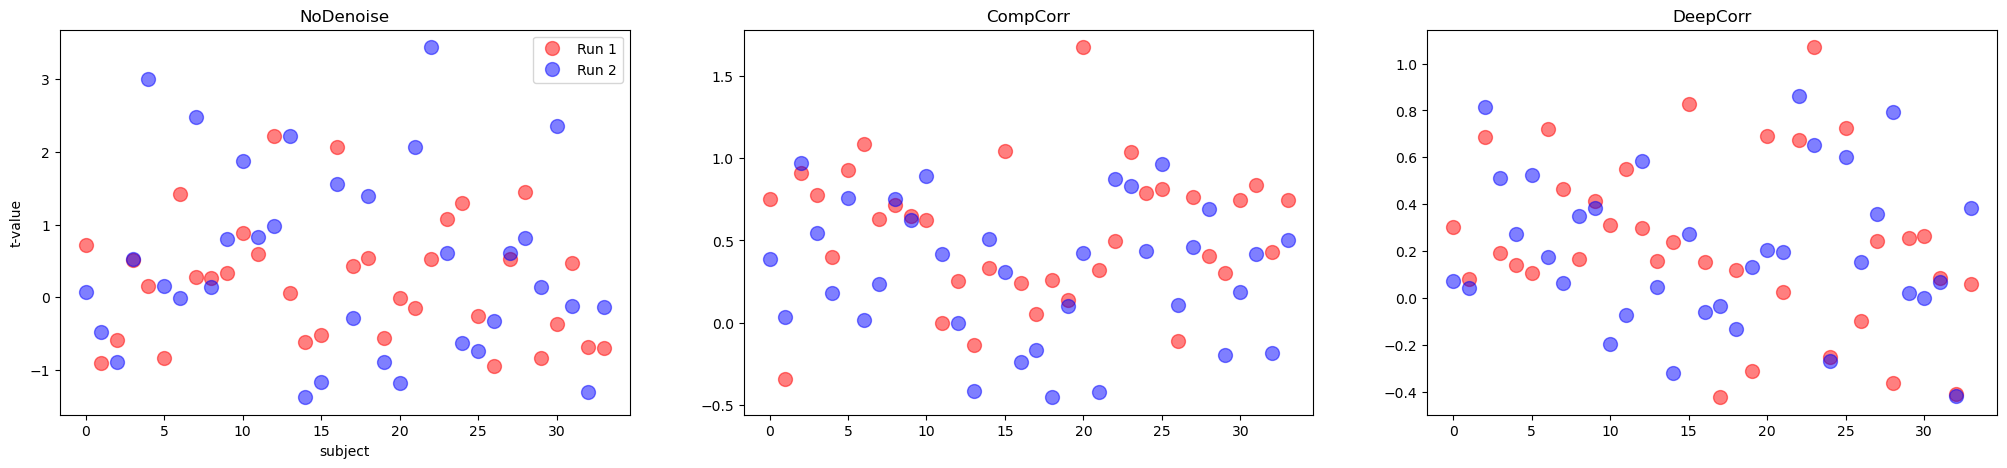

In [241]:
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.plot(roi_vals_raw_run1,'r.',markersize=20,alpha=.5)
plt.plot(roi_vals_raw_run2,'b.',markersize=20,alpha=.5)
plt.xlabel('subject')
plt.ylabel('t-value')
plt.legend(['Run 1','Run 2'])
plt.title('NoDenoise')

plt.subplot(1,3,2)
plt.plot(roi_vals_compcor_run1,'r.',markersize=20,alpha=.5)
plt.plot(roi_vals_compcor_run2,'b.',markersize=20,alpha=.5)
plt.title('CompCorr')

plt.subplot(1,3,3)
plt.plot(roi_vals_deepcor_run1,'r.',markersize=20,alpha=.5)
plt.plot(roi_vals_deepcor_run2,'b.',markersize=20,alpha=.5)
plt.title('DeepCorr')

In [187]:
ys = [np.corrcoef(roi_vals_raw_run1,roi_vals_raw_run2)[0,1],
np.corrcoef(roi_vals_compcor_run1,roi_vals_compcor_run2)[0,1],
np.corrcoef(roi_vals_deepcor_run1,roi_vals_deepcor_run2)[0,1]]

In [188]:
ys

[0.3446607052497164, 0.5239369193539996, 0.4366953949583271]

Text(0.5, 1.0, 'Across subject Rel')

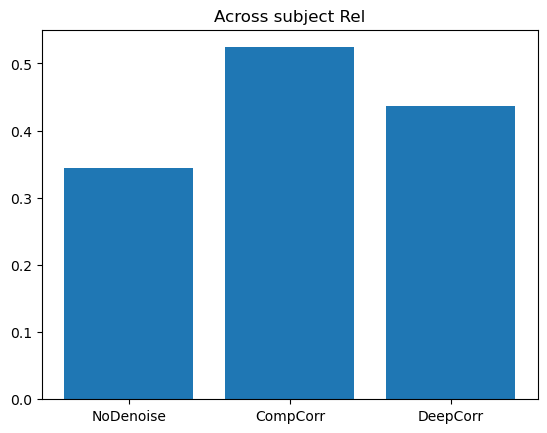

In [189]:
xs = [0,1,2];
plt.bar(xs,ys);
plt.xticks(xs,['NoDenoise','CompCorr','DeepCorr']);
plt.title('Across subject Rel')

In [190]:
voxelwise_rel_nodenoise = [np.corrcoef(ims_raw_run1[i].numpy()[roi_mask],ims_raw_run2[i].numpy()[roi_mask])[0,1] for i in range(nsubs)]
voxelwise_rel_compcor = [np.corrcoef(ims_compcor_run1[i].numpy()[roi_mask],ims_compcor_run2[i].numpy()[roi_mask])[0,1] for i in range(nsubs)]
voxelwise_rel_deepcor = [np.corrcoef(ims_deepcor_run1[i].numpy()[roi_mask],ims_deepcor_run2[i].numpy()[roi_mask])[0,1] for i in range(nsubs)]

voxelwise_rel_nodenoise = np.array(voxelwise_rel_nodenoise)
voxelwise_rel_compcor = np.array(voxelwise_rel_compcor)
voxelwise_rel_deepcor = np.array(voxelwise_rel_deepcor)

Text(0.5, 1.0, 'Within subject Rel')

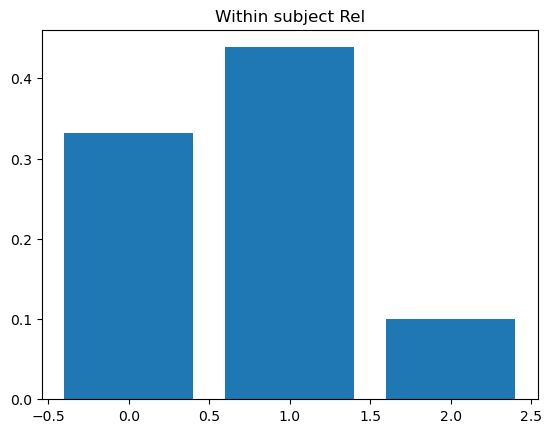

In [191]:
ys = [voxelwise_rel_nodenoise.mean(),voxelwise_rel_compcor.mean(),voxelwise_rel_deepcor.mean()]
xs = [0,1,2]
plt.bar(xs,ys)
plt.title('Within subject Rel')

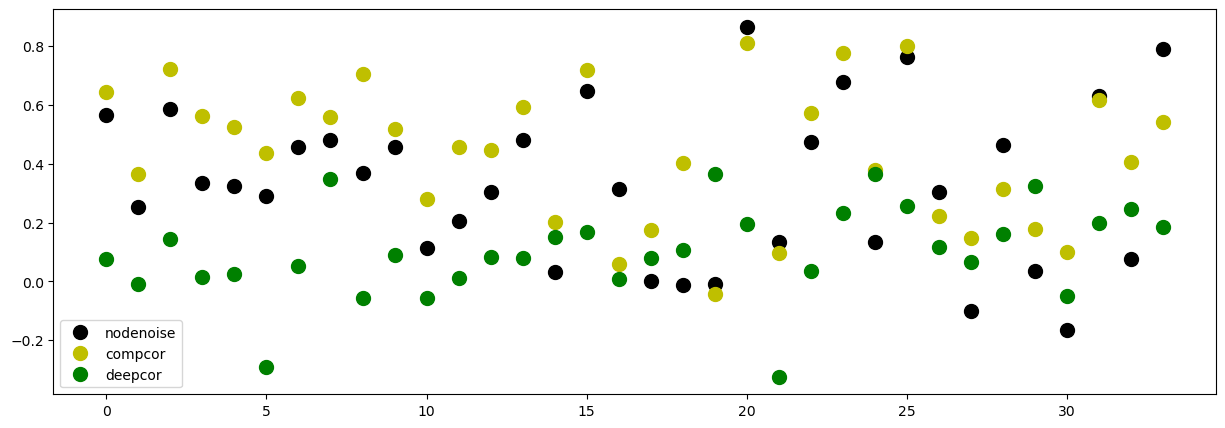

In [192]:
plt.figure(figsize=(15,5))
plt.plot(voxelwise_rel_nodenoise,'k.',markersize=20)
plt.plot(voxelwise_rel_compcor,'y.',markersize=20)
plt.plot(voxelwise_rel_deepcor,'g.',markersize=20)
plt.legend(['nodenoise','compcor','deepcor'])

In [193]:
avg_im_nodenoise = ims_raw_run1[0].new_image_like(np.array([val.numpy() for val in ims_raw_run1+ims_raw_run2]).mean(axis=0))
avg_im_compcor = ims_compcor_run1[0].new_image_like(np.array([val.numpy() for val in ims_compcor_run1+ims_compcor_run2]).mean(axis=0))
avg_im_deepcor = ims_deepcor_run1[0].new_image_like(np.array([val.numpy() for val in ims_deepcor_run1+ims_deepcor_run2]).mean(axis=0))

avg_im_nodenoise.to_filename('../Misc/avg_im_nodenoise.nii')
avg_im_compcor.to_filename(f'../Misc/avg_im_{compor_name}.nii')
avg_im_deepcor.to_filename(f'../Misc/avg_im_{deepcor_name}.nii')

In [194]:
cons_raw_run1 = [ants.image_read(analysis_fn_raw.replace('spmT_0001','con_0001').format(r=1,sub=sub)) for sub in subs]
cons_raw_run2 = [ants.image_read(analysis_fn_raw.replace('spmT_0001','con_0001').format(r=2,sub=sub)) for sub in subs]

cons_compcor_run1 = [ants.image_read(analysis_fn_compcor.replace('spmT_0001','con_0001').format(r=1,sub=sub,name=compor_name)) for sub in subs]
cons_compcor_run2 = [ants.image_read(analysis_fn_compcor.replace('spmT_0001','con_0001').format(r=2,sub=sub,name=compor_name)) for sub in subs]

cons_deepcor_run1 = [ants.image_read(analysis_fn_deepcor.replace('spmT_0001','con_0001').format(r=1,sub=sub,name=deepcor_name)) for sub in subs]
cons_deepcor_run2 = [ants.image_read(analysis_fn_deepcor.replace('spmT_0001','con_0001').format(r=2,sub=sub,name=deepcor_name)) for sub in subs]

In [195]:
resMS_raw_run1 = [ants.image_read(analysis_fn_raw.replace('spmT_0001','ResMS').format(r=1,sub=sub)) for sub in subs]
resMS_raw_run2 = [ants.image_read(analysis_fn_raw.replace('spmT_0001','ResMS').format(r=2,sub=sub)) for sub in subs]

resMS_compcor_run1 = [ants.image_read(analysis_fn_compcor.replace('spmT_0001','ResMS').format(r=1,sub=sub,name=compor_name)) for sub in subs]
resMS_compcor_run2 = [ants.image_read(analysis_fn_compcor.replace('spmT_0001','ResMS').format(r=2,sub=sub,name=compor_name)) for sub in subs]

resMS_deepcor_run1 = [ants.image_read(analysis_fn_deepcor.replace('spmT_0001','ResMS').format(r=1,sub=sub,name=deepcor_name)) for sub in subs]
resMS_deepcor_run2 = [ants.image_read(analysis_fn_deepcor.replace('spmT_0001','ResMS').format(r=2,sub=sub,name=deepcor_name)) for sub in subs]

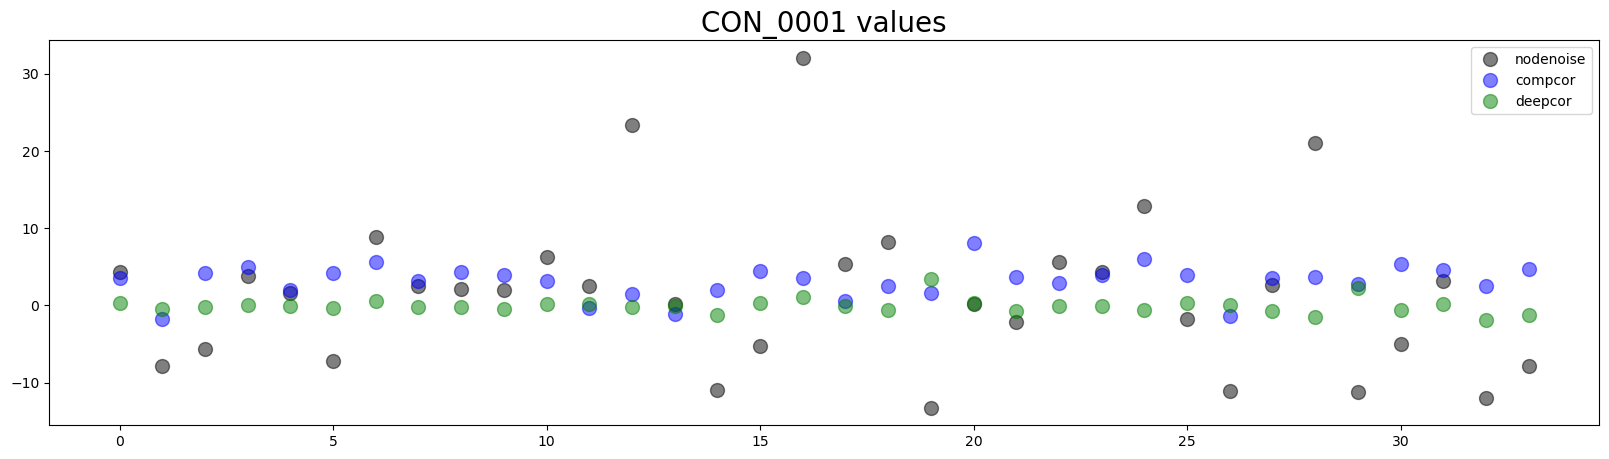

In [196]:
plt.figure(figsize=(20,5))

arr1 = [im.numpy()[roi_mask].mean() for im in cons_raw_run1]
arr2 = [im.numpy()[roi_mask].mean() for im in cons_compcor_run1]
arr3 = [im.numpy()[roi_mask].mean() for im in cons_deepcor_run1]

plt.plot(arr1,'k.',markersize=20,alpha=.5)
plt.plot(arr2,'b.',markersize=20,alpha=.5)
plt.plot(arr3,'g.',markersize=20,alpha=.5)

plt.title('CON_0001 values',fontsize=20)
plt.legend(['nodenoise','compcor','deepcor'])

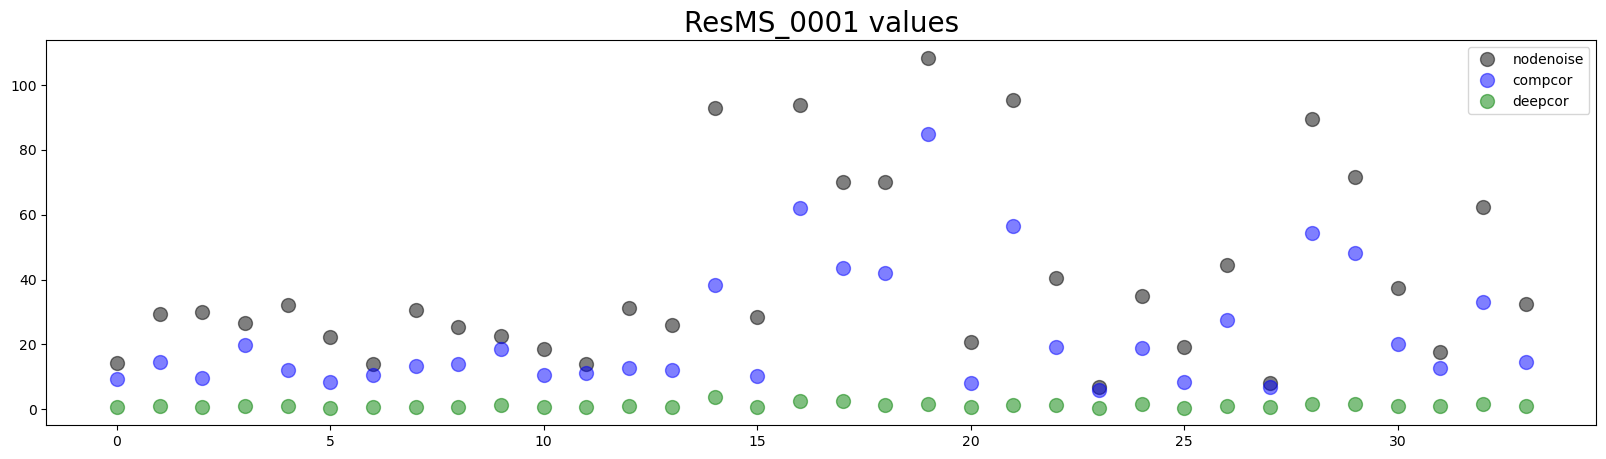

In [154]:
plt.figure(figsize=(20,5))

arr1 = [im.numpy()[roi_mask].mean() for im in resMS_raw_run1]
arr2 = [im.numpy()[roi_mask].mean() for im in resMS_compcor_run1]
arr3 = [im.numpy()[roi_mask].mean() for im in resMS_deepcor_run1]

plt.plot(arr1,'k.',markersize=20,alpha=.5)
plt.plot(arr2,'b.',markersize=20,alpha=.5)
plt.plot(arr3,'g.',markersize=20,alpha=.5)

plt.title('ResMS_0001 values',fontsize=20)
plt.legend(['nodenoise','compcor','deepcor'])